In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

# Progress bar
from tqdm.auto import trange, tqdm

In [2]:
# jedi 0.14.1 tab completion fails; will be fixed in 0.14.2
import jedi
if jedi.__version__ == '0.14.1':
    %config Completer.use_jedi = False

In [3]:
import webbpsf_ext, webbpsf
webbpsf_ext.setup_logging('WARN', verbose=False)

In [4]:
inst = webbpsf.NIRCam()
inst.filter='F405N'
inst.include_si_wfe = False

In [5]:
%%time

inst.detector_position = (1024,1024) # center
psf_cen = inst.calc_psf(fov_pixels=64, oversample=4)

inst.detector_position = (10,10) # bottom left
psf_corn1 = inst.calc_psf(fov_pixels=64, oversample=4)

inst.detector_position = (10,2000) # top left
psf_corn2 = inst.calc_psf(fov_pixels=64, oversample=4)

inst.detector_position = (2000,2000) # top right
psf_corn3 = inst.calc_psf(fov_pixels=64, oversample=4)

inst.detector_position = (2000,10) # bottom right
psf_corn4 = inst.calc_psf(fov_pixels=64, oversample=4)

CPU times: user 11.6 s, sys: 1.01 s, total: 12.6 s
Wall time: 7.92 s


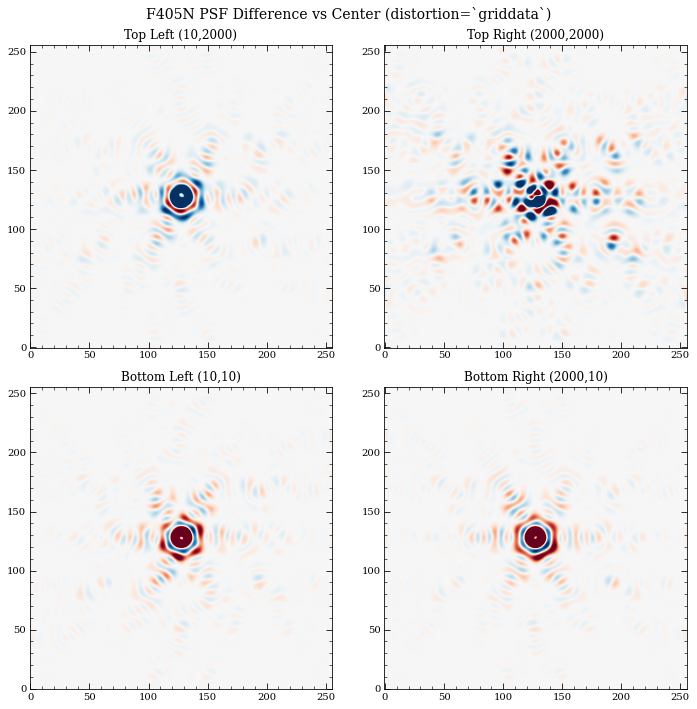

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()

im_cen = psf_cen[2].data

imdiff1 = psf_corn1[2].data - im_cen
imdiff2 = psf_corn2[2].data - im_cen
imdiff3 = psf_corn3[2].data - im_cen
imdiff4 = psf_corn4[2].data - im_cen

imall = [imdiff2, imdiff3, imdiff1, imdiff4]
titles = ['Top Left (10,2000)', 'Top Right (2000,2000)', 
          'Bottom Left (10,10)', 'Bottom Right (2000,10)']
for i, im in enumerate(imall):
    ax = axes[i]
    
    med = np.median(im)
    std = np.std(im)
    vmin, vmax = 5*std*np.array([-1,1])
    ax.imshow(im, interpolation='bicubic', cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])
    
fig.suptitle('F405N PSF Difference vs Center (distortion=`griddata`)', fontsize=14)
    
fig.tight_layout()

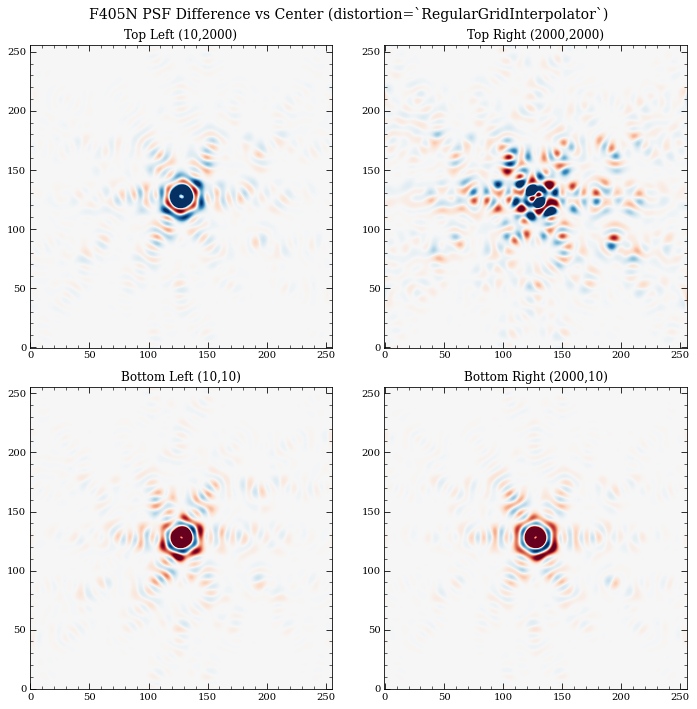

In [8]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()

im_cen = psf_cen[2].data

imdiff1 = psf_corn1[2].data - im_cen
imdiff2 = psf_corn2[2].data - im_cen
imdiff3 = psf_corn3[2].data - im_cen
imdiff4 = psf_corn4[2].data - im_cen

imall = [imdiff2, imdiff3, imdiff1, imdiff4]
titles = ['Top Left (10,2000)', 'Top Right (2000,2000)', 
          'Bottom Left (10,10)', 'Bottom Right (2000,10)']
for i, im in enumerate(imall):
    ax = axes[i]
    
    med = np.median(im)
    std = np.std(im)
    vmin, vmax = 5*std*np.array([-1,1])
    ax.imshow(im, interpolation='bicubic', cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])
    
fig.suptitle('F405N PSF Difference vs Center (distortion=`RegularGridInterpolator`)', fontsize=14)
    
fig.tight_layout()